<a href="https://colab.research.google.com/github/cxbxmxcx/EvolutionaryDeepLearning/blob/main/EDL_12_5_Genetic_Plasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Scenario Imports
import numpy as np
import random
import matplotlib.pyplot as plt

import os
import time
import cv2
import urllib.request
from IPython.display import clear_output

In [ ]:
#@title Image Helpers
def load_target_icon(icon_url, size):
  icon_path = "target_icon"    
  urllib.request.urlretrieve(icon_url,icon_path)
  target = cv2.imread(icon_path, cv2.IMREAD_GRAYSCALE) 
  return cv2.resize(src=target, dsize=size, interpolation=cv2.INTER_AREA)

def show_icon(icon_arr):    
    plt.figure(figsize=(5,5))
    plt.axis("off")
    plt.imshow(255-icon_arr, cmap='Greys')
    plt.show()

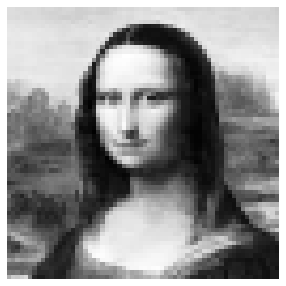

(64, 64)


In [ ]:
#@title Select the Target Image/Icon { run: "auto" }
target_icon = "Mona Lisa" #@param ["Mona Lisa", "Wolf", "Trash", "Happy"]
size = 64 #@param {type:"slider", min:16, max:64, step:1}

target_urls = { 
    "Mona Lisa" : "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZgVzl5ashVmS9cFLqcoAJT6SxCMxWlgbJOw&usqp=CAU",
    "Wolf" : 'https://www.clipartmax.com/png/middle/235-2350420_other-wolf-icon-16x16-images-loup-icon.png',
    "Trash" : 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAeFBMVEX///8AAABZWVmgoKCnp6fm5ub29vbFxcWRkZEqKiotLS1VVVW9vb2srKzV1dVERERMTEzLy8uzs7NkZGQ7Ozs2Njby8vLc3Nybm5uEhIQaGhpqampGRkbW1tbq6urOzs55eXmNjY0LCwtfX19ycnIbGxt+fn4jIyNwDIdUAAAFMUlEQVR4nO2d63aiMBRGi1zsBbQ6IlKt2uro+7/hoHZmdfiiJiE37bd/zoLM2ZWQ5CQkDw8WydJVPi6KJEniMyRJMe5XU5tB2CMbz/eRJK+zyne4yizrJ1m9E73cd8hKpDs1vSPl2HfY8sw0/A4MV74jl2Mw1BRs+Mh8Ry9Bou/XsEh9x3+VeSfBhsCf1Gmvq2AUBf3CyV67C0ZRyO2GgV/wQN+3x1k618G/hNrD6fYW/c4kzEZjYEwwina+ZURkHRp6JMSqaO4ZPfDkWwfJjApGUeJbCDD7E0bRW3AvmzPDwc+Xj6K/GrxX6YnqxPugYTXq5/FuckYx9m3UIhdGuY+X128diTtCobUYG1GQa8kETCFUHNmNWJHlmyDER+nbVyLD2mK86ogeUpUIRb2FZ2vR6rAV1COlAkSv4qB6p8+dq9ELllDYiVWLJYbXUyyij0VsrcSqxwjDUx7GYrsYUkXEWvSpnKl/xDJshKoJRveqXIagxZDoLrgCU9zybeE/0DCgzCKmLzQSZmgYUHOBfTaNfBl2i4I21Bij4+iEhibJLiLIk+aX7xAVgoaDa7eYII3Xm5fFcFJOni/wCcHtL10uBsqIni5cXTYhDV9787pbzirTmel0TdnBsfrtO3o5NBrfr1+w9B26LLqjEN3JavfoJuZu5ifUnXOsfIetgN5Qcuw7bAVKLcPbqYYNWoa176hV0BpKrn1HrYLWUPL+DQU50HDRMjS27sAFNKRh+KgY9svhgcXiRoZOJyaLY9TDjYSheDb3VpDpvtEwbO7fUGZeloZhQ8OfYSiYUL8hFjT8EYaCdRU3hMz6AeEas5vhhYY/wvDdd5CdkFlstqwb1tv1vGHTOwAzvIueHzYwKB8e//1XE+p2vd01gevNs8EclLfVu7CA0dBHYOEYwopwQ1/y0dAdNNSFhu6goS40dAcNdaGhO2ioCw3dYcsQvkiCUVk2aIFr0N/bl8Aqpmn7Cpy5XlyNRA/YSgDKhRzrW/uKtH1F9NG+JG5fgZnB65E4M4QNA9AQli7D52GYVaIhDWlIQxrSkIY0pCENaUhDGtKQhjSkIQ1pSEMa0pCGNKQhDU0ZOps/hJlXV4bX52r1uD637MgwA0NDW7fTkIY0pCENaUhDGtKQhjSkIQ1pSEMa0pCG/xvCvu00pCEN79cQttegIQ1pSMOuwDk54Rga+pqVhjSkIQ1pSEMaBmQ4heP17s5wT0Mayhomd28Y05CGNKQhDWlIQxrSUN8Q9mS/N8PlmyXDTSiGUzBcmTH81S53Fozh4M4M8Sml4a0Z8imlYfiGfErNGUJwrgzhTB8a0vCcIWzj7GgvaHeGNfzXeQtY55K1r8hhy++0fQV0q/HP5MzQETTUBgzXZspVpqKhLj/QcG6mXGUGd2+Ix2vaMtyYKVcZPObWlqHMYZ82wAO1bRnKHCtsA3eGZWamYFUKZ4YRngDjhJ07Qz8vU2wsTBlusWTI6ztgCev2ogjPJNICK7ggVWOdSiAoc864FJAAaugZ+vPJAuPjA3rnGwuYiUqPhvNtXdePB2Yn4m8khSLfb/4q71j2x+GEaZj+OmFK8GEqLt87Bsepc98uYgxWFMF7OgCMtlmCBsM/Rt91S982AiAd2Q1I13rn2XTnGLtunjHeHmewO6pfDJ1e+R1Rt9AfVjrGKXzP4Q9L3eIMPgj2hYVH9Etx7VvtyN7Q981CRAMp18ynFgWb943vn7E0tP3zBVKfPbjS2IjwItUMdjNywzx3l+RLR+MiiR2SFHmlV//+AF5Ms0xZGeWpAAAAAElFTkSuQmCC',
    "Happy" : 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAilBMVEUAAAD8/vz///+1t7XLzcspKik2Njb5+/mpqqnx8/Ho6uj3+ffb3duhoqHi5OJsbWx+f37Bw8G6vLp5enmXmJdzdHPNzs1UVVSjpaPm6OYWFhYgICCMjYyGh4ZMTUxcXVxERETW19Y9Pj0oKCgODg5BQUFnZ2eLjIswMDAbHBtPUE9aW1oUFBQiIyKCZkikAAANTklEQVR4nO1dZ5faOhBdC4NNM3UpCXULYbPJ//97zzZdM5JmZNkW7+R+yDkbsKyL2mjqy0sVeG82m++bOO5/NW84VvLq0nH4ns7CUKAIU8wa823dfbTGbjhbLk9cAhQXpklntX66Af3uJ4GGG2QaBPv+ru5eU/E2DqncJJ7t8aRZd++NOMSJBbsbyWjfn9fNQYP5om1P724op3UTwfEWR4XpXUmGw4+6+chYh27Y3UiOXuvmdIfWuOOU35nkclA3sTM+xo5mJ+SY+LAiB8ty6J05isWPevm9JiXyO5EM4vf6+DXHZfPLOUZxTfx+VMIv5ygmdRBsVMUv55hUfnasOzx+6PWJ9fzys0p+Lfr5fibTSDE9tk44TrM/GwmLpwjGPysjuAoo3cp63+32pitNS7/703HUJfIU7WE1/DZdQneyi+3+ldij4WuypJBMRblyqeX46Ju7kkmVQ+YlaL6aEUiKduk7zjYx9CKbcfHmy6btr21snK9C7F1TesTA2IF2XEiz9DpuG19R5hV5rH15tmU6uA6s93qOIijt/N/NdG9Oh2/oSGNmOozE2M17ZGx0rxWOt/L0QNK9rdty+bIzFtrxG+1cv2+qW5Ci++36fbolWAa/DClHzY/ad/w2NUFRzpTJoROe3FJsqd9Usii1Uk9VlxRbkeo1QqzdvQbFbqTkKPpWggWCpopgKmBUYFGZKC9qouNGq3pUEuxUpO5TDqPouGheNUVT8bMyvfRAtauKdvHGVSNYrXXhvaEcxaI/s2oNiqhiO9hUsZ2LTrHtRjlFG446TsenqiuFDg0FwRKlex3CEijiM0MEG2e9ZkGxGAtQxEU10auJ4MvL1jFFBcGZ007zsMVPRmG3rx/wxkLHneZh00N7ZSX8b3CCdVlJrkBVYaJr0RI6H4QHDkw4Rb5iY4+2cyihx2ygE5U9udZoK54Y1vG1yFMyDlCC9W4yd8AmqhCsJvwmqKDI0YajDXhEEJ+ojFNx5T1BBcU34sNfiPmsVkkGBcaQanxDDgrmMq4CmIwqaHo/VJipTdhWY4AwbJMM4dhv48lB+IgRMtcoog32XPU3ehIQWxhhLHbIUw4UWuUAk53/mh5Ctpmu8aG6sIngcCwMzwyRIfRwl7kgRrpreARq0J2bsZxiCfurv2TAIRRJzQ6eevzkDiLUnvtw59VhCnvc03wdquvq11qYgKwr9aC04IgnFfbVDi3OICJD6FNIgALIPFUN4hf8ahWecoUBDkXlIEINsCjNB8El4HVWMYg/4BdL8j1yDSCHKfZHZD57fRTeMIeHImpUBGeh0Hn3egXaIAINqRs3gEoAL+0R4iQC9Gulu8o4BBxEeMy9ge94eytEAFYiIqqAq/0zDSE2iGCXhPtMHR21xm/QffmkA2v1Wc7CC+AgGr/gyiuuIoDTXNadPvsQvnzIy0ySqYFoV+el4tvKwxlslY9ngWznsLgXTsKklyKZ/rbp37WVfW8pRC/5xfZJ2kkEHw3WLfkCwr3a/x1Ft6C7ru058zmLTkEz2b8drgcJmKb3xiTgWBLxYm8fHUBtOTakVjq8cQQr7d6IId8MtcocAOjEK8SS1bkM0DOfGePUBM/fTVP5rGDdKl4x3broMhfSFG2lzXE/AON0Ow+gTMpo91XlQszajeHl9NwKY9+SFeB32yVonuFh9K2OFmAQRIwJl1aoluv0SFQPFBhexk6qjkcUS7KK4F0dHcMxr4PFdt3wAHe6Akrh1Xpqhmzx0EX9MWLx5bl4dc4A7kF0/Qzu3ndB+w+tFcVSPneGrmqAF4zzB32ZOt2xRBuRSHZw0Ufe0qfCBzi2zo78skTHsNpru5aC1MinvhXGIMo/1WUhgibJh5Bij7+1RDJcoV6C962QY8fkLfnypNwgXaDBnQTvmiJNMN1ulbdC3msAw9Pwyz8h416h7xnVicM01en7wpd0gzhTmShPESOgo4AMJwzpPzm4I+ULTjaF2097iKhihuBEzDcCeQPC1MU4TFtEUPkYAoaZcAwObbpQ+sfEj9Y3hwzBistkPuDjR5pZJ5jWIe3INzJkGFAw4UVmyIk/0YWT522ZHJRyGJOJMK6a2BjKKn8OQ1neA33bUVpZmFpheEZ25WePyNWJ4QP1buobqRVwAZdB7xBwthBNKFGwXIT0+bCoamU0euXWCsftjMSQ0Z7+3pM3TwFipbbtEGD4VZCh/gZMtgzoBpHnOQgOxFVRhpo1xIgnUyt7uNp3WaWYKWSKMVTLNYK2kZ6AxzrmPxMva4PsA4YwZPt0q4JzeY63ylaY/sllMMQ7x85XhbfS5RovSmGYboWgdyxN7gkHpBX6JeCCchi+7ELJpmIVQ/Tde+QoxIifOaUkhukFJbykksvzcVtmVPvei7tmxnRt9w2lMXx5+ZyOc+Nhb7QtkKJyMxh1chPkaGfDr1SGnuAfw38M/cc/hv8Y+g8CwyfzSZTx/2dYwv3QM7i/4/sG93oa34Dp2oroS/0DxrCIzts/YDrvInYL/+Da9uQfMNvTH9mAZJM2yxcA16BcnSJbufnqH3+A2oDhZlpRFYkygJuZgBPKU4UDPQJspblOrIA/jW9Q+NMU8InyDcBR4ewBEMgUfa6xqAWQaM5bSgHfRM8AAmPOW0oB/1K/ALMHnf1LC/gI+wUYYnj5BHzwFIkGIMBpeBWxi/jq+wS1r36ReAuPoIm3gDEzhSLsyoPe918TMwOHV3/Pn9Z0nAz0gUbAUfbO2wUsRH0s/kenUUOCs2OozyWjjV0Dzh4m169Ou/KMwgtTrN4vmcR9/CE7hnQrxLJSjpO20TdAG0PKjwM+ZCXIKrsqv42EUdCCcsvDEPBjudMGRVANx89RZto3rXxDLDcUa4xhrpkGS4hx6ZVYjlmQsdmFDKT8knNcgQSEZtk0V9KJkrfVY3iK7TbKkXAWSsoYc+YMiHzmZ+uxNDH2cCo5TPGRk/UX0DoBI6nNa+zsqJWux1JEgMm5tpwIzR46hBGC+WkI/q/b3sWDKSF55TNwq9hOuq4S8tNA2ZQU5XA5ZrLiqltn6VCag1tFcxJBSo4h2yRDt5NUiHboJF/I67578+GjaW8peaKAnooaqrK+603mkFaMZHPVvaOXtkiSnGi5vqzztR0eQhIy573G3OqUfD80Oo/VcqmKTWLSPTCIVH3ND+kFmQNm2JizzpDtfDSTiwELqqEPbKSKnHvIIFLDCaZyJv7cgzKZTSiLaLee7JdIqWPRpjpgwqFRjD2SvpQ6Dm8zJHFH1usoEtO+6iR5X/QXIsILrAu6tR3JfanIUgSzDjPyl66VcWxCC9VDHXrlOnr+0oI5aMfkUvdGCE5AHgzbUd/fkZS8HDtUU10ylMkvZkjzrDzCWDpvlur03QFHwfQdZOWCdpDP+7XYXE23JuZtjJnP20VO9jd7jqkAz9UasHOyO8mr32x0LUhmCcz4Eh87r76r2gifMx7JTAxaWSh9LGojQBEvCLpWRVUH2Q2BxDITZe0y9dnUt0BrlFjmLT/uGiPNoX5hJ0YD2woaVjVKXNeZ+R3HsgRzL9L04wJKHrs6M2iKg6hgmZLNr2HSSbE8ZUTMsVivCmqwbGsFYdmtnFWP3RwOB1daK/t6T+gG5Z/ncIGaXc9Rdw2L4adviU9aO4+TgfxJ6x9yRCLsDPOJYuEaloo6pN6sRQd1SBW1ZD0ZRRe1ZFX1gL0YRbweML+gPV7T2YNRdFXTWVWXu3aK7upy+1lbfYArLa1qq6syw9a6Frf4XUylATZCQbG+UcRk0cBG0XKFgmJdNR9VSWyKRNtFOMWAvzU7gCInVbFwwhZOsY6I709VVwrGSzZV7UZW6il7KPYYB9EhRxVFdoKjInhXLMFAdIgZtTVQTtQKY2sUpyDvSqiGahR5NrAiUNp7XBVOU63F7EpWgXMiLJ9xfX3syoNHNVGzc6PsmkI7tcHOZdT5mzqxoWiXGpCpMUg6DqtXVy8QJXJcBWqTgPO8AZoCDUKMdo7fluHPXJPEV3TdJ0ZY6H5PMXI+jtO2xqYjojJ8Wjc6K5LruZrOT93bZiU57Wqz4QrRaTiS5FqhwSRX3gauq5aScQz2xWWAt/XewK/Um83AYNVNJ2tcqBj7YBmZXtGzvdATkRg5ChHb3ZA/+rHRLs6s42WFFWKZgiMZDnkK2rfNKCSY/UW7iqqFX/r029eRTPavtO11PlkkEcWrQVRWg1knajyy7EbxVNur/rTTNXkzXBtsVxefbNrOJZ7p4mkg0PtfgoaCaqOT1/p88zhPmmupooHlZ6UEXzLvKWfupASCSR11UX84dJk18KtKmQDQHJO2nKL8ojrTA/w2CQDF+QUxryaqczRLnatCLDzI0fFnzNwX6fS6viRTbaVnh3OO6fngVZ6cjSM//Ss90fAuc8XHr8DRbE2bCYelR1BbYb5oFyaZLr7ZqnLxhYFDvLcnmcVJ7QcF0vJXhNZ6TPXwfmQn2o3W82Q0XDRUQWkoNxEk/SfMKrqe9JYdzT3i/NGy01/v6u5rAWy3h1kY7rHbU5j+/3xbeRqYknBspvg5jHMM/mZ/VbTk/gPQmaTgDLt5jAAAAABJRU5ErkJggg=='  
    }

target_icon_url = target_urls[target_icon]
target = load_target_icon(target_icon_url, (size, size))
show_icon(target)
print(target.shape)

In [ ]:
#initial population
population = 300
genes = size*size
generations = 10000

pop = np.random.uniform(0,1, size=(population,genes))
print(pop)

[[0.54853855 0.36050232 0.91620458 ... 0.28044466 0.19880014 0.79889185]
 [0.72677849 0.23323529 0.0245627  ... 0.77331516 0.77028589 0.48616122]
 [0.18998844 0.59326996 0.65364363 ... 0.71253222 0.03061934 0.6689522 ]
 ...
 [0.46190685 0.51580344 0.55379753 ... 0.53566433 0.73421052 0.87314137]
 [0.45164026 0.62047723 0.70110461 ... 0.01015341 0.36619834 0.1834855 ]
 [0.54971437 0.33238306 0.72919939 ... 0.19878361 0.50419132 0.85250932]]


In [ ]:
def render(individual):
  return np.reshape(individual, (-1, size))

def fitness(individual):
  """Calculates Mean Square Error Fitness for a render"""   
  fitness = (np.square(render(individual) - target)).mean(axis=None)
  return 1/fitness

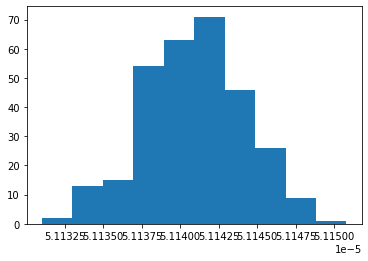

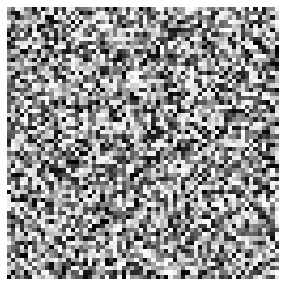

In [ ]:
def evaluate(pop):
  return np.array([fitness(ind) for ind in pop])

plt.hist(evaluate(pop))
show_icon(render(pop[0]))

In [ ]:
def elite_selection(fitness):
  return fitness.argsort()[:-2][::-1] 

parents = elite_selection(evaluate(pop))
print(parents)

[136 227 184 126  15  89  83 235 246 123 202 101  33  39  49 216 100 163
 177 241 128 111  64 263  58 230 280 143  84 289 195  32   3 223 288  71
 293 265  77  59 204  60 115 218 182 298 122  56 264 124 272  14 181 192
  74  48   1 119 256 125 274 170 129  36 113 214 152 211  18  55 131 257
  35  40   5 282 213 197 151  95 279  21   9  76 240  96 180  19 196  24
 108 249 273 166  37 106 297 248 237  41  65 171 148 225 221 168 291  66
 146  26 243  91  61 169 259 189  57 141 160 285 103 296  68 135 209 277
  53  90  16 200 299 114  73 239 242 215 271 164 137  38  78 286 144 105
 287 236  46  99 175  54 198 226 173  23 205 174 121 276 107  80 231 116
 210 109 199 251 281 153  63  69   6  22  50 186  86  44 252 140 208  30
 222 104 228 120  85 234 260  88 295 283   4 255 220 172 139 250 207 134
 132 110  42 138 284 158 292  62  79  98 133 193 162   8 203 102 149   7
 278 261 176 194 217 290 190 147 244  75 269  70 154  87 267  11 254 270
  27  82 247 275 238  51   0 262 294 229  17  72 12

In [ ]:
def crossover(parent1, parent2, crossover_rate):
  # children are copies of parents by default
  child1, child2 = parent1.copy(), parent2.copy()  
  # check for recombination
  if random.random() < crossover_rate:
    # select crossover point that is not on the end of the string
    pt = random.randint(1, len(parent1)-2)
    # perform crossover    
    child1 = np.concatenate((parent1[:pt], parent2[pt:]))
    child2 = np.concatenate((parent2[:pt], parent1[pt:]))
  return [child1, child2]

crossover(parents[0],parents[1], .15)

[136, 227]

In [ ]:
def mutation(individual, mutation_rate):
  for i in range(len(individual)):
	  # check for a mutation
    if random.random() < mutation_rate:      
      individual[i] = individual[i] + random.uniform(-.1,.1)
  return individual

mutation(pop[parents[0]], .5)

array([0.77836349, 0.45576452, 0.64377903, ..., 0.08807663, 0.57325956,
       0.19620773])

In [ ]:
def plasticity(individual):
  original = individual.copy()
  f1 = fitness(individual)
  indvidual = mutation(individual, 1.0)
  f2 = fitness(individual)
  if f1 < f2:
    return individual
  else:
    return original

plasticity(pop[parents[0]])

array([0.78884338, 0.38132252, 0.65878433, ..., 0.07478428, 0.63420725,
       0.19891541])

In [ ]:
def simple_GA(pop, crossover_rate=.5, mutation_rate=.05):   
  parents = elite_selection(evaluate(pop))
  children = np.zeros((population,genes))  
  for i in range(population):
    offspring = crossover(pop[parents[0]],pop[parents[1]], crossover_rate)
    children[i] = mutation(offspring[0],mutation_rate)  
    children[i] = plasticity(children[i])
  return children

pop = simple_GA(pop)
pop = simple_GA(pop)

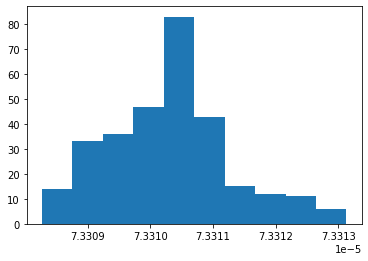

Generation 9901
    Max fitness 7.331313160769754e-05
    Min fitness 7.330826774340672e-05
    Mean fitness 7.331030854373338e-05
    Std fitness 9.706239340739723e-10


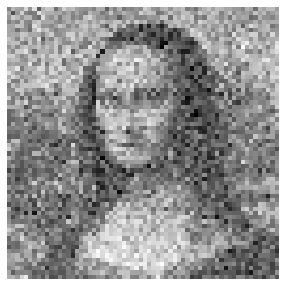

In [ ]:
#initial population
pop = np.random.uniform(0,1, size=(population,genes))
render_gen = 100

for i in range(generations):
  pop = simple_GA(pop)
  if i % render_gen == 0:  
    clear_output()
    fit = evaluate(pop) 
    parents = elite_selection(fit) 
    plt.hist(fit)
    plt.show()
    print(f"Generation {i+1}")
    print(f"    Max fitness {np.max(fit)}")
    print(f"    Min fitness {np.min(fit)}")
    print(f"    Mean fitness {np.mean(fit)}")
    print(f"    Std fitness {np.std(fit)}")
    show_icon(render(pop[parents[0]]))
    time.sleep(1)